# Sales Forecast Analytics
**DATA SCIENCE PRODEGREE PROJECT**

In [1]:
#Calling library
import warnings
import itertools
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt1
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")


from matplotlib import pyplot

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\sonal\\Desktop\\Sales Forecast capstone project'

In [4]:
os.chdir("C:\\Users\\sonal\\Desktop\\Sales Forecast capstone project")

In [5]:
os.getcwd()

'C:\\Users\\sonal\\Desktop\\Sales Forecast capstone project'

In [6]:
# fetching the data in excel and assigning a data frame

df = pd.read_excel("Sales_Forecast_Data.xlsx")

In [7]:
# checking the data

df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [8]:
# renaming the column heads based om data dictionary

df1=df.rename({"FIN_YEAR": "Financial Year","MONTH": "Month of sale", "STATE": "State of India", "FG":"Pesticide type" ,"DISTRICT":"District of state","COMPANY":"Company name", "VALUE": "Pesticide Quantity"},axis='columns')

In [9]:
# checking the column data heads with change names
df1

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59
...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00


In [10]:
# Mapping FY date years from Financial year
df2 = pd.DataFrame({'Financial Year': ['2014-2015', '2015-2016','2016-2017','2017-2018'],
                    'FY': ['2014-','2015-','2016-','2017-']})
df2

,Financial Year,FY
0,2014-2015,2014-
1,2015-2016,2015-
2,2016-2017,2016-
3,2017-2018,2017-


In [11]:
# merging this new data with FY to original data
df3= pd.merge(df1, 
                      df2, 
                      on ='Financial Year', 
                      how ='left')
df3

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity,FY
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-
...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016-
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016-
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016-
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016-


In [12]:
# Mapping date months from Months
df5 = pd.DataFrame({'Month of sale': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                     'Monthdate of sale': ['01-01','02-01','03-01','04-01','05-01','06-01','07-01','08-01','09-01','10-01','11-01','12-01']})
df5


,Month of sale,Monthdate of sale
0,Jan,01-01
1,Feb,02-01
2,Mar,03-01
3,Apr,04-01
4,May,05-01
5,Jun,06-01
6,Jul,07-01
7,Aug,08-01
8,Sep,09-01
9,Oct,10-01


In [13]:
# adding/Merging Monthdata to Original data
df4= pd.merge(df3, 
                      df5, 
                      on ='Month of sale', 
                      how ='left')
df4

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity,FY,Monthdate of sale
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-,11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-,11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-,11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-,11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-,11-01
...,...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016-,12-01
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016-,12-01
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016-,12-01
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016-,12-01


In [14]:

#Mapping state code to state of India
df6 = pd.DataFrame({'State of India': ['Haryana','Himachal Pradesh','Punjab','Uttar Pradesh','Uttarakhand'],
                     'State_CD': ['HR','HP','PU','UP','UT']})
df6

,State of India,State_CD
0,Haryana,HR
1,Himachal Pradesh,HP
2,Punjab,PU
3,Uttar Pradesh,UP
4,Uttarakhand,UT


In [15]:
# Merging state code to Original data
df7= pd.merge(df4, 
                      df6, 
                      on ='State of India', 
                      how ='left')
df7

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity,FY,Monthdate of sale,State_CD
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-,11-01,HR
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-,11-01,HR
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-,11-01,HR
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-,11-01,HR
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-,11-01,HR
...,...,...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016-,12-01,UP
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016-,12-01,UP
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016-,12-01,UP
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016-,12-01,UP


In [16]:
# checking the new data with additional new coloumns added
print (df7)

       Financial Year Month of sale State of India Pesticide type  \
0           2014-2015           Nov        Haryana   Insecticides   
1           2014-2015           Nov        Haryana   Insecticides   
2           2014-2015           Nov        Haryana   Insecticides   
3           2014-2015           Nov        Haryana   Insecticides   
4           2014-2015           Nov        Haryana   Insecticides   
...               ...           ...            ...            ...   
230147      2016-2017           Dec  Uttar Pradesh   Bactericides   
230148      2016-2017           Dec  Uttar Pradesh   Bactericides   
230149      2016-2017           Dec  Uttar Pradesh   Bactericides   
230150      2016-2017           Dec  Uttar Pradesh   Bactericides   
230151      2016-2017           Jan  Uttar Pradesh   Bactericides   

       District of state       Company name  Pesticide Quantity     FY  \
0                 Rohtak            monous               675.00  2014-   
1                 Rewar

In [17]:
#checking numbers of rows
len(df7)

230152

In [20]:
df7.shape

(230152, 10)

In [21]:
#checking class of data
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230152 entries, 0 to 230151
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Financial Year      230152 non-null  object 
 1   Month of sale       230152 non-null  object 
 2   State of India      230152 non-null  object 
 3   Pesticide type      230152 non-null  object 
 4   District of state   230152 non-null  object 
 5   Company name        230152 non-null  object 
 6   Pesticide Quantity  230152 non-null  float64
 7   FY                  230152 non-null  object 
 8   Monthdate of sale   230152 non-null  object 
 9   State_CD            230152 non-null  object 
dtypes: float64(1), object(9)
memory usage: 19.3+ MB


In [22]:
# Concatenating date coloumn from FY
df7['Date']=df7['FY'].map(str)+df7['Monthdate of sale'].map(str)

In [23]:
df7

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity,FY,Monthdate of sale,State_CD,Date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-,11-01,HR,2014-11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-,11-01,HR,2014-11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-,11-01,HR,2014-11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-,11-01,HR,2014-11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-,11-01,HR,2014-11-01
...,...,...,...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016-,12-01,UP,2016-12-01
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016-,12-01,UP,2016-12-01
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016-,12-01,UP,2016-12-01
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016-,12-01,UP,2016-12-01


In [24]:
#checking class of object
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230152 entries, 0 to 230151
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Financial Year      230152 non-null  object 
 1   Month of sale       230152 non-null  object 
 2   State of India      230152 non-null  object 
 3   Pesticide type      230152 non-null  object 
 4   District of state   230152 non-null  object 
 5   Company name        230152 non-null  object 
 6   Pesticide Quantity  230152 non-null  float64
 7   FY                  230152 non-null  object 
 8   Monthdate of sale   230152 non-null  object 
 9   State_CD            230152 non-null  object 
 10  Date                230152 non-null  object 
dtypes: float64(1), object(10)
memory usage: 21.1+ MB


In [22]:
#converting date from object to timeseries
df7['Date']=pd.to_datetime(df7['Date'])


In [23]:
df7

,Financial Year,Month of sale,State of India,Pesticide type,District of state,Company name,Pesticide Quantity,FY,Monthdate of sale,State_CD,Date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,2014-,11-01,HR,2014-11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,2014-,11-01,HR,2014-11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,2014-,11-01,HR,2014-11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,2014-,11-01,HR,2014-11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,2014-,11-01,HR,2014-11-01
...,...,...,...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.00,2016-,12-01,UP,2016-12-01
230148,2016-2017,Dec,Uttar Pradesh,Bactericides,Bulandshahr,disescent,6.75,2016-,12-01,UP,2016-12-01
230149,2016-2017,Dec,Uttar Pradesh,Bactericides,Lucknow,disescent,0.00,2016-,12-01,UP,2016-12-01
230150,2016-2017,Dec,Uttar Pradesh,Bactericides,Basti,disescent,486.00,2016-,12-01,UP,2016-12-01


In [25]:
#Rearranging columns of New data in proper format
df8=df7.reindex(columns= ['Financial Year','Month of sale','Date','Quarter','Company name','State of India','State_CD','District of state','Pesticide type','Pesticide Quantity'])
df8

,Financial Year,Month of sale,Date,Quarter,Company name,State of India,State_CD,District of state,Pesticide type,Pesticide Quantity
0,2014-2015,Nov,2014-11-01,NaN,monous,Haryana,HR,Rohtak,Insecticides,675.00
1,2014-2015,Nov,2014-11-01,NaN,monous,Haryana,HR,Rewari,Insecticides,73.71
2,2014-2015,Nov,2014-11-01,NaN,monous,Haryana,HR,Gurgaon,Insecticides,405.00
3,2014-2015,Nov,2014-11-01,NaN,monous,Haryana,HR,Mewat,Insecticides,1188.00
4,2014-2015,Nov,2014-11-01,NaN,monous,Haryana,HR,Palwal,Insecticides,5188.59
...,...,...,...,...,...,...,...,...,...,...
230147,2016-2017,Dec,2016-12-01,NaN,ABC Manufacturing,Uttar Pradesh,UP,Etah,Bactericides,0.00
230148,2016-2017,Dec,2016-12-01,NaN,disescent,Uttar Pradesh,UP,Bulandshahr,Bactericides,6.75
230149,2016-2017,Dec,2016-12-01,NaN,disescent,Uttar Pradesh,UP,Lucknow,Bactericides,0.00
230150,2016-2017,Dec,2016-12-01,NaN,disescent,Uttar Pradesh,UP,Basti,Bactericides,486.00


In [26]:
# checking Null values
df8.isnull().values.any()
df8.isnull().sum()
df8.isnull().count()

Financial Year        230152
Month of sale         230152
Date                  230152
Quarter               230152
Company name          230152
State of India        230152
State_CD              230152
District of state     230152
Pesticide type        230152
Pesticide Quantity    230152
dtype: int64

In [27]:
# assigning data fram and what is persticide sales for differnet company based on different pesticide type
ds=df8.groupby( ['Company name','Pesticide type'])['Pesticide Quantity'].sum()/1000 

In [28]:
#chrcking data of different company and type for each 
ds

Company name       Pesticide type
ABC Manufacturing  Bactericides          0.000000
                   Herbicides         4443.205185
                   Insecticides      35663.930505
                   Rodenticides      11354.723100
agizu              Bactericides          0.000000
                                         ...     
yore               Rodenticides          0.000000
zooloo             Bactericides         10.617480
                   Herbicides          248.518125
                   Insecticides       3941.958285
                   Rodenticides         75.343014
Name: Pesticide Quantity, Length: 188, dtype: float64

In [29]:
# checking data type
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230152 entries, 0 to 230151
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Financial Year      230152 non-null  object 
 1   Month of sale       230152 non-null  object 
 2   Date                230152 non-null  object 
 3   Quarter             0 non-null       float64
 4   Company name        230152 non-null  object 
 5   State of India      230152 non-null  object 
 6   State_CD            230152 non-null  object 
 7   District of state   230152 non-null  object 
 8   Pesticide type      230152 non-null  object 
 9   Pesticide Quantity  230152 non-null  float64
dtypes: float64(2), object(8)
memory usage: 19.3+ MB


In [30]:
#characterstics of data
df8.describe()

,Quarter,Pesticide Quantity
count,0.0,230152.000000
mean,NaN,704.973592
std,NaN,2261.623760
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,269.865000
max,NaN,69828.750000


In [31]:
df8["Date"].min(),df8["Date"].max()

('2014-01-01', '2017-12-01')

In [32]:
#creating another dataframe for time series with sales and date
cols = ['Financial Year','Month of sale','Quarter','Company name','State of India','State_CD','District of state','Pesticide type']
df8.drop(cols, axis=1, inplace=True)

In [33]:
df8.head()

,Date,Pesticide Quantity
0,2014-11-01,675.00
1,2014-11-01,73.71
2,2014-11-01,405.00
3,2014-11-01,1188.00
4,2014-11-01,5188.59


In [34]:
df8.isnull().count()

Date                  230152
Pesticide Quantity    230152
dtype: int64

In [35]:
#aggregate sales by date
df9=df8.groupby('Date')['Pesticide Quantity'].sum().reset_index()
df9
df9.isnull().count()

Date                  46
Pesticide Quantity    46
dtype: int64

In [36]:
#converting in 1000's in Metric tonnes
df9['Pesticide Quantity']=df9['Pesticide Quantity']/1000

In [37]:
df9
df9.isnull().count()

Date                  46
Pesticide Quantity    46
dtype: int64

In [38]:
# setting date as Index
df9.set_index('Date',inplace = True)

In [39]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2014-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pesticide Quantity  46 non-null     float64
dtypes: float64(1)
memory usage: 736.0+ bytes


In [41]:
df9.head()

,Pesticide Quantity
Date,
2014-01-01,3937.521564
2014-02-01,3101.152095
2014-03-01,3311.789274
2014-04-01,1826.279600
2014-05-01,2527.515090


In [45]:
df9.index

Index(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
       '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-04-01', '2017-05-01', '2017-06-01',
       '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
       '2017-12-01'],
      dtype='object', name='Date')

In [46]:
#sampling of data
#df9.index
    y=df9["Pesticide Quantity"].resample("MS").mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

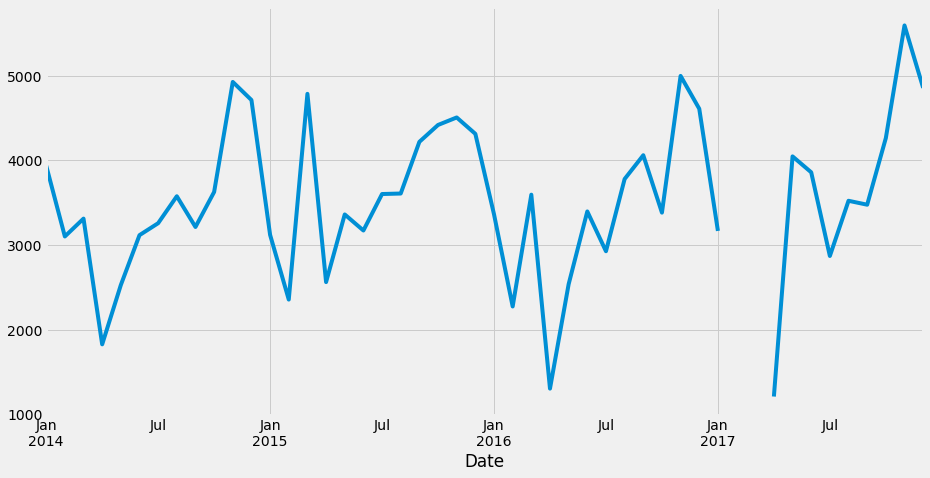

In [41]:
#plotting graph of pesticide 
y.plot(figsize=(14,7))
plt1.show()

In [42]:
#Check for missing values 
y.isnull().values.any()
y.isnull().sum()
y

Date
2014-01-01    3937.521564
2014-02-01    3101.152095
2014-03-01    3311.789274
2014-04-01    1826.279600
2014-05-01    2527.515090
2014-06-01    3116.539530
2014-07-01    3257.797998
2014-08-01    3576.262857
2014-09-01    3213.171315
2014-10-01    3626.686845
2014-11-01    4926.552300
2014-12-01    4712.866416
2015-01-01    3119.697990
2015-02-01    2355.526332
2015-03-01    4785.982227
2015-04-01    2562.099417
2015-05-01    3361.274820
2015-06-01    3171.508830
2015-07-01    3602.441250
2015-08-01    3608.315505
2015-09-01    4218.847875
2015-10-01    4418.284752
2015-11-01    4506.923295
2015-12-01    4313.426985
2016-01-01    3362.858559
2016-02-01    2274.133563
2016-03-01    3594.612168
2016-04-01    1303.618455
2016-05-01    2537.274443
2016-06-01    3396.644213
2016-07-01    2926.428480
2016-08-01    3779.580150
2016-09-01    4060.724603
2016-10-01    3382.496618
2016-11-01    4997.825496
2016-12-01    4609.633347
2017-01-01    3166.623504
2017-02-01            NaN
2017-03

In [43]:
y.describe()

count      46.000000
mean     3527.197439
std       937.880961
min      1209.840705
25%      3117.329145
50%      3499.405538
75%      4179.317057
max      5594.396720
Name: Pesticide Quantity, dtype: float64

In [44]:
#Assigning mean to null value
y.fillna(y.mean(),inplace=True)

In [45]:
# checking 
y.isnull().values.any()
y.isnull().sum()


0

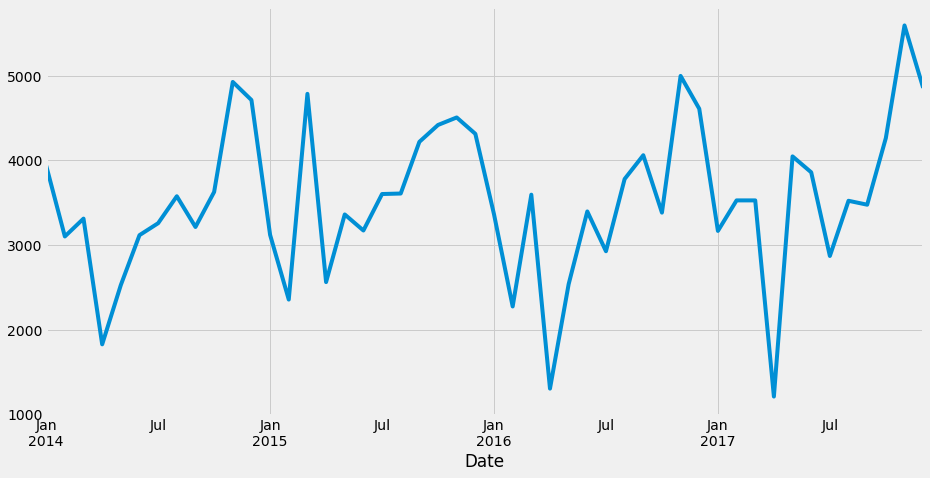

In [46]:
#plotting graph of pesticide 
y.plot(figsize=(14,7))
plt1.show()

In [47]:
#checking for stationarity
#augemented Dickey fuller (ADF)
#H0: Time series can be represented by unit root,that it is not stationary
#H1: if we reject null hypothesis then time series is stationary

In [48]:
from pandas import Series 
from statsmodels.tsa.stattools import adfuller 
result =adfuller(y)
result

print('p value: %f' % result[1])



p value: 0.001045


In [49]:
lables =['ADF Test statistics','p-value','#lags used','#Number of Observations Used']
for value,label in zip(result,lables):
    print(label+':'+str(value))
if result[1] <= 0.05:
        print ("Strong evidence against the null hypothesis (H0),reject the null hypothesis ,Data has no unit root and is stationary")
else :
        print ("Weak evidence against null hypothesis (H1), time series has a unit root ,indicating it is non stationary ")

ADF Test statistics:-4.080046024259107
p-value:0.0010447511540997657
#lags used:7
#Number of Observations Used:40
Strong evidence against the null hypothesis (H0),reject the null hypothesis ,Data has no unit root and is stationary


In [50]:
#Decomposition of data in trend,seasonal and residual

from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
y.sort_index(inplace = True)

In [52]:
decomposition = seasonal_decompose(y)

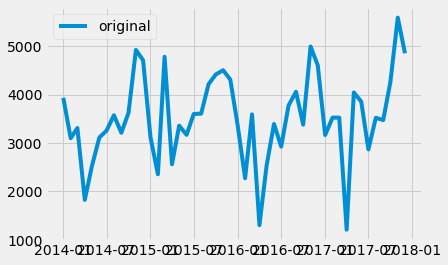

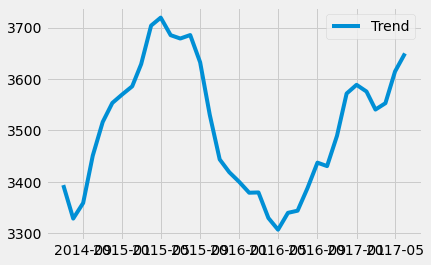

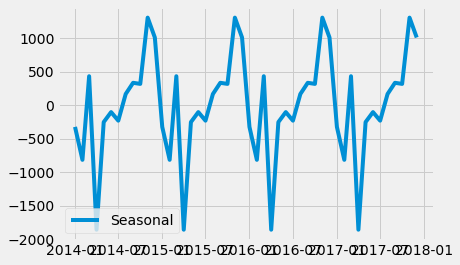

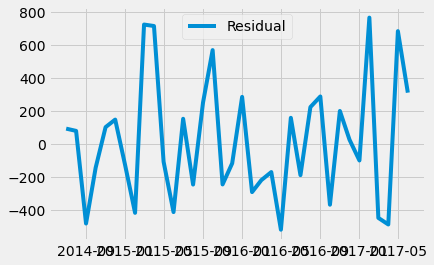

In [53]:
plt1.plot(y,label = "original")
plt1.legend(loc = "best")
trend = decomposition.trend
plt1.show()
plt1.plot(trend,label = "Trend")
plt1.legend(loc = "best")
seasonal = decomposition.seasonal
plt1.show()
plt1.plot(seasonal,label = "Seasonal")
plt1.legend(loc = "best")
residual = decomposition.resid
plt1.show()
plt1.plot(residual,label = "Residual")
plt1.legend(loc = "best")

# Building forecasting model using Moving Average 

In [54]:
# Moving Average Method
y.rolling(window=2).mean()

Date
2014-01-01            NaN
2014-02-01    3519.336830
2014-03-01    3206.470685
2014-04-01    2569.034437
2014-05-01    2176.897345
2014-06-01    2822.027310
2014-07-01    3187.168764
2014-08-01    3417.030428
2014-09-01    3394.717086
2014-10-01    3419.929080
2014-11-01    4276.619573
2014-12-01    4819.709358
2015-01-01    3916.282203
2015-02-01    2737.612161
2015-03-01    3570.754280
2015-04-01    3674.040822
2015-05-01    2961.687119
2015-06-01    3266.391825
2015-07-01    3386.975040
2015-08-01    3605.378378
2015-09-01    3913.581690
2015-10-01    4318.566314
2015-11-01    4462.604024
2015-12-01    4410.175140
2016-01-01    3838.142772
2016-02-01    2818.496061
2016-03-01    2934.372865
2016-04-01    2449.115311
2016-05-01    1920.446449
2016-06-01    2966.959328
2016-07-01    3161.536346
2016-08-01    3353.004315
2016-09-01    3920.152376
2016-10-01    3721.610610
2016-11-01    4190.161057
2016-12-01    4803.729421
2017-01-01    3888.128426
2017-02-01    3346.910472
2017-03

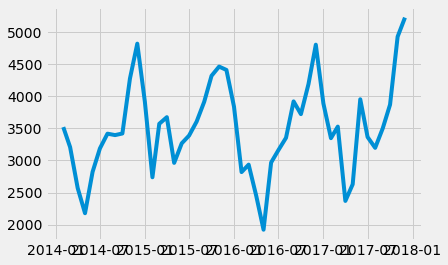

In [55]:
plt1.plot(y.rolling(window=2).mean())

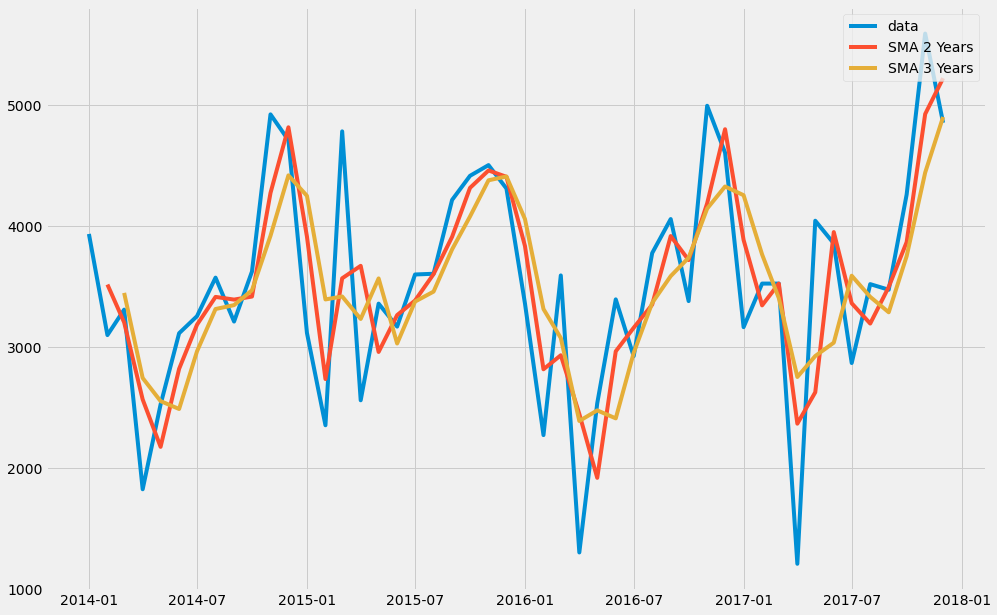

In [56]:
plt1.figure(figsize=[15,10])
plt1.grid(True)
plt1.plot(y,label='data')
plt1.plot(y.rolling(window=2).mean(),label='SMA 2 Years')
plt1.plot(y.rolling(window=3).mean(),label='SMA 3 Years')
plt1.legend(loc=1)

# Building forecasting model using Exponential smoothing

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [58]:
# Simple Exponential Smoothing Method --- with Alpha = 0.20
fit1 = SimpleExpSmoothing(y).fit(smoothing_level=0.2,optimized=False)

In [59]:
# Fitted Values
fit1.fittedvalues

Date
2014-01-01    3937.521564
2014-02-01    3937.521564
2014-03-01    3770.247670
2014-04-01    3678.555991
2014-05-01    3308.100713
2014-06-01    3151.983588
2014-07-01    3144.894777
2014-08-01    3167.475421
2014-09-01    3249.232908
2014-10-01    3242.020590
2014-11-01    3318.953841
2014-12-01    3640.473532
2015-01-01    3854.952109
2015-02-01    3707.901285
2015-03-01    3437.426295
2015-04-01    3707.137481
2015-05-01    3478.129868
2015-06-01    3454.758859
2015-07-01    3398.108853
2015-08-01    3438.975332
2015-09-01    3472.843367
2015-10-01    3622.044268
2015-11-01    3781.292365
2015-12-01    3926.418551
2016-01-01    4003.820238
2016-02-01    3875.627902
2016-03-01    3555.329034
2016-04-01    3563.185661
2016-05-01    3111.272220
2016-06-01    2996.472664
2016-07-01    3076.506974
2016-08-01    3046.491275
2016-09-01    3193.109050
2016-10-01    3366.632161
2016-11-01    3369.805052
2016-12-01    3695.409141
2017-01-01    3878.253982
2017-02-01    3735.927886
2017-03

In [60]:
# Model Parameters 
fit1.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3937.5215640000083,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
# Model Parameters (Formated form)
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.200000,False
initial_level,l.0,3937.521564,False


In [62]:
# Model Selection Criteria (AIC, AICc, BIC)
fit1.aic, fit1.aicc, fit1.bic

(662.4980294697522, 663.4282620278917, 666.240431491568)

In [63]:
# Predction for next Years
fcast1 = fit1.forecast(1)
fcast1

2018-01-01    4148.924988
Freq: MS, dtype: float64

In [64]:
# Simple Exponential Smoothing Method --- with Alpha = 0.60
fit2 = SimpleExpSmoothing(y).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(1)
fcast2

2018-01-01    4886.268872
Freq: MS, dtype: float64

In [65]:
# Model Selection Criteria (AIC, AICc, BIC)
fit2.aic, fit2.aicc, fit2.bic

(663.6651555475574, 664.595388105697, 667.4075575693732)

In [66]:
# Simple Exponential Smoothing Method --- with optimized Alpha value automatically computed by the Statsmodels library 
fit3 = SimpleExpSmoothing(y).fit()

In [67]:
# Model Selection Criteria (AIC, AICc, BIC)
fit3.aic, fit3.aicc, fit3.bic

(661.4505468317868, 662.3807793899264, 665.1929488536026)

In [68]:
# Compare Model-1, 2 and 3 based on AIC, AICc, and BIC
model1fit = fit1.aic,fit1.aicc,fit1.bic
model2fit = fit2.aic,fit2.aicc,fit2.bic
model3fit = fit3.aic,fit3.aicc,fit3.bic

results=(pd.DataFrame(index=["AIC","AICc","BIC"] ,columns=['Model-1', "Model-2","Model-3"]))
results["Model-1"] = model1fit
results["Model-2"] = model2fit
results["Model-3"] = model3fit
results

,Model-1,Model-2,Model-3
AIC,662.498029,663.665156,661.450547
AICc,663.428262,664.595388,662.380779
BIC,666.240431,667.407558,665.192949


In [69]:
# Predction for next Years
fcast3 = fit3.forecast(1)
fcast3

2018-01-01    4596.74303
Freq: MS, dtype: float64

In [70]:
# Model Parameters
fit3.params

{'smoothing_level': 0.380388064687755,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3324.5355402983873,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
# Accessing the Value of Alpha
fit3.params['smoothing_level']

0.380388064687755

In [72]:
#Simple Exponential Smoothing Methods: Graphical Comparison

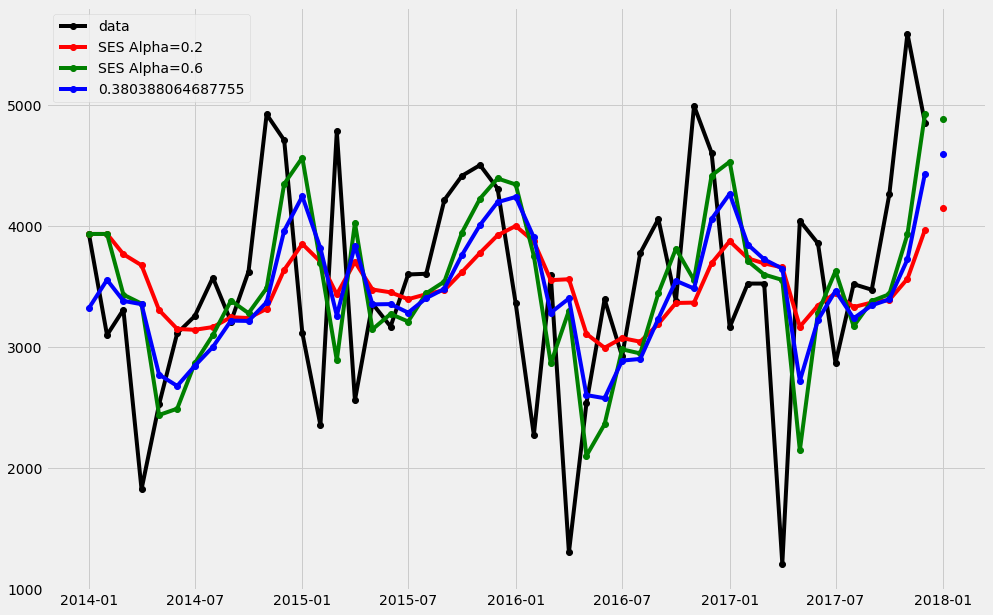

In [73]:
plt1.figure(figsize=[15,10])
plt1.grid(True)
# Actucal data
plt1.plot(y,label='data',color='black',marker='o')

# SES with Alpha = 0.2
plt1.plot(fcast1,label='SES Alpha=0.2',color='red',marker='o')
plt1.plot(fit1.fittedvalues,color='red',marker='o')

# SES with Alpha = 0.6
plt1.plot(fcast2,label='SES Alpha=0.6',color='green',marker='o')
plt1.plot(fit2.fittedvalues,color='green',marker='o')

# SES with Optimum Alpha 
plt1.plot(fcast3,label=fit3.params['smoothing_level'],color='blue',marker='o')
plt1.plot(fit3.fittedvalues,color='blue',marker='o')

plt1.legend(loc=2)

# Building forecasting model using ARIMA

In [74]:
p = d = q = range(0,2)
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("example of parameter combinations for seasonal ARIMA...")
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))

example of parameter combinations for seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)


In [75]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [76]:
#parameter selection using gride search

#grid search
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order = param,
                                           seasonal_order = param_seasonal,enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}X{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:906.0442670969519
ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:1526.6363657253414
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:560.5951868054408
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:361.498941035131
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:578.8478993785269
ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:933.5684836067953
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:377.17579648452363
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:363.2855878971137
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:861.2963059154866
ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:2920.7668875721442
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:544.3288213511261
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:349.23454180505723
ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:579.4926046905177
ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:2803.599023438204
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:379.17537315554927
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:350.2334711648998
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:777.2179793138598
ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:1409.0003011441456
ARIMA

# Fitting the SARIMA model considering data is cyclic

In [77]:
# Fitting the SARIMA model considering data is cyclic
mod = sm.tsa.statespace.SARIMAX(y, order = (0, 1, 1),seasonal_order =(0, 1, 1, 12))
results = mod.fit()

In [78]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8382      0.125     -6.685      0.000      -1.084      -0.592
ma.S.L12      -0.5734      0.274     -2.094      0.036      -1.110      -0.037
sigma2      3.509e+05   1.08e+05      3.255      0.001     1.4e+05    5.62e+05


In [79]:
# Fitting the ARIMA model which is not appropiate since the data is seasonal

from statsmodels.tsa.arima_model import ARIMA

In [80]:
mod1 = ARIMA(y, order = (0, 1, 1))
results1 = mod1.fit()

In [81]:
print(results1.summary().tables[1])

                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.8320      9.377      1.369      0.171      -5.546      31.210
ma.L1.D.Pesticide Quantity    -1.0000      0.071    -14.019      0.000      -1.140      -0.860


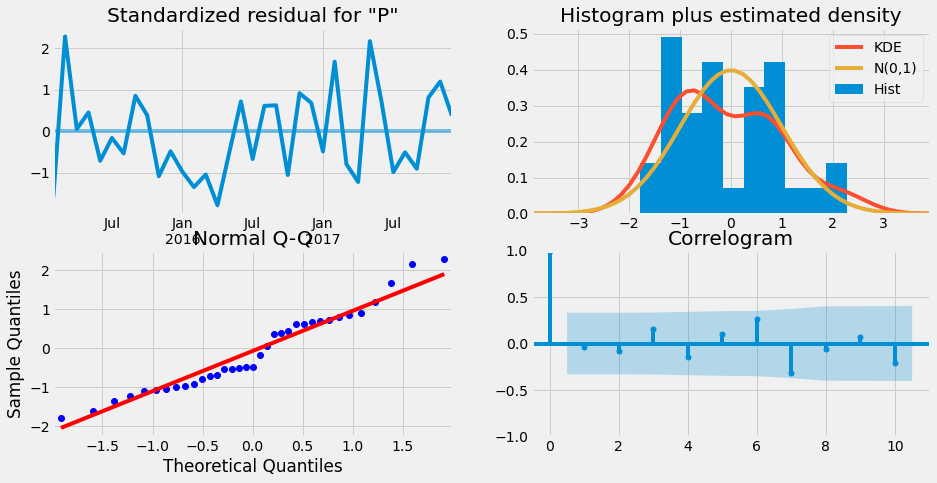

In [82]:
results.plot_diagnostics(figsize= (14,7))
plt1.show()

In [83]:
# Validating forecast
# set  forecast to start at 2017-01-01 and validating with observed data

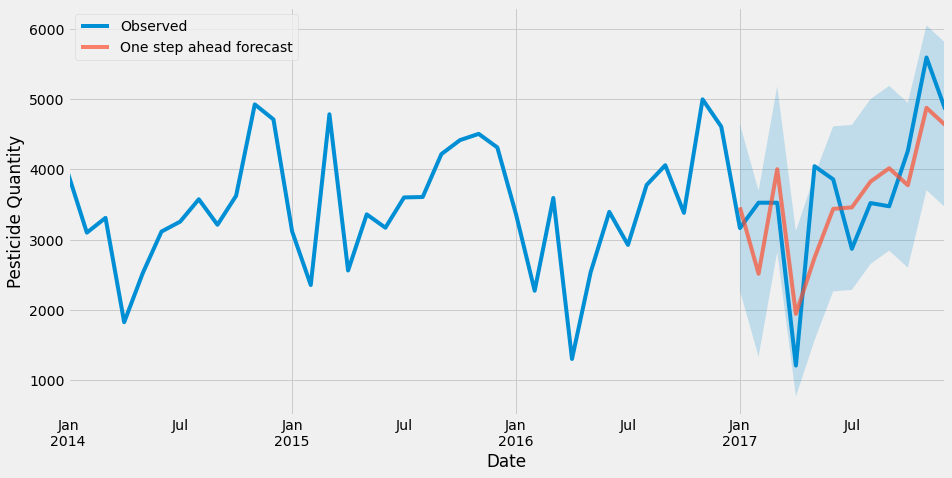

In [84]:
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"),dynamic = False)
pred_ci = pred.conf_int()
ax = y["2014":].plot(label = "Observed")
pred.predicted_mean.plot(ax = ax,label = "One step ahead forecast", alpha = .7 ,figsize= (14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], alpha = .2)
ax.set_xlabel("Date")
ax.set_ylabel("Pesticide Quantity")
plt1.legend()
plt1.show()

In [85]:
pred.predicted_mean

Date
2017-01-01    3460.882785
2017-02-01    2515.818431
2017-03-01    4004.264301
2017-04-01    1945.357043
2017-05-01    2744.010091
2017-06-01    3439.694026
2017-07-01    3460.575297
2017-08-01    3827.485302
2017-09-01    4017.801382
2017-10-01    3775.918542
2017-11-01    4877.838717
2017-12-01    4633.443318
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
#calculate RMSE for 2017 data
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted-y_truth)**2).mean()
rmse = round(np.sqrt(mse),2)

In [87]:
mse

440640.241245278

In [88]:
rmse

663.81

In [89]:
# forecasting for 2018-19

2018-01-01    3585.431271
2018-02-01    3239.701663
2018-03-01    3977.316998
2018-04-01    1853.456457
2018-05-01    3612.364609
2018-06-01    3798.449197
2018-07-01    3339.047638
2018-08-01    3885.144798
2018-09-01    4001.177177
2018-10-01    4259.549081
2018-11-01    5416.270979
2018-12-01    4890.298725
2019-01-01    3724.261553
2019-02-01    3378.531945
2019-03-01    4116.147280
2019-04-01    1992.286740
2019-05-01    3751.194891
2019-06-01    3937.279480
2019-07-01    3477.877920
2019-08-01    4023.975081
2019-09-01    4140.007459
2019-10-01    4398.379364
2019-11-01    5555.101262
2019-12-01    5029.129007
Freq: MS, Name: predicted_mean, dtype: float64             lower Pesticide Quantity  upper Pesticide Quantity
2018-01-01               2416.762093               4754.100449
2018-02-01               2055.659635               4423.743690
2018-03-01               2778.291547               5176.342448
2018-04-01                639.671844               3067.241071
2018-05-01    

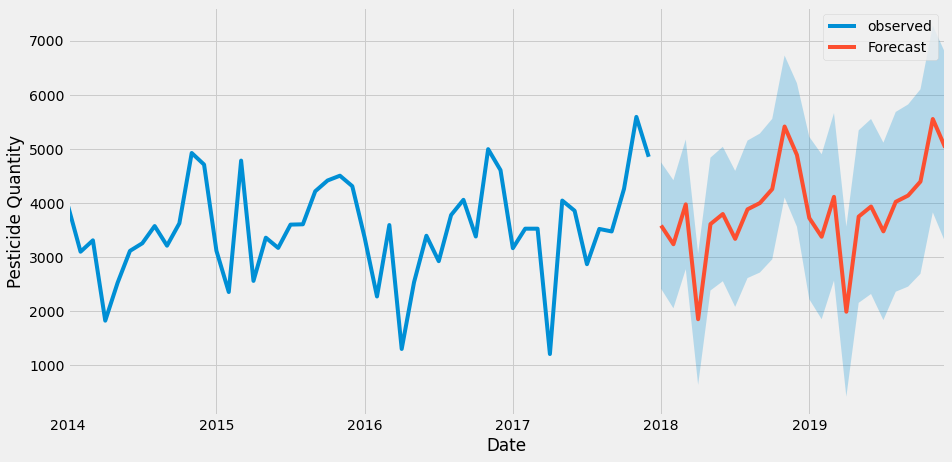

In [90]:
pred_uc = results.get_forecast(steps= 24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label= "observed",figsize = (14,7))
pred_uc.predicted_mean.plot(ax= ax,label = "Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel("Pesticide Quantity")
print(pred_uc.predicted_mean,pred_ci)
#print(pred_ci)
plt1.legend()
plt1.show()